In [67]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import json
import os

In [68]:
kaggle_dictionary = json.load(open('kaggle.json'))

In [69]:
kaggle_dictionary.keys()

dict_keys(['username', 'key'])

In [70]:
os.environ['KAGGLE_USERNAME'] = kaggle_dictionary['username']
os.environ['KAGGLE_KEY'] = kaggle_dictionary['key']

In [71]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [72]:
with ZipFile('/content/sms-spam-collection-dataset.zip') as zip_data:
 zip_data.extractall()

In [73]:
!ls

kaggle.json  sample_data  sms-spam-collection-dataset.zip  spam.csv


In [74]:
data = pd.read_csv('/content/spam.csv' , encoding='latin-1')

In [75]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [77]:
# removing un-necessary cols

data.drop(columns=['Unnamed: 2'  , 'Unnamed: 3' , 'Unnamed: 4'] , inplace= True)

In [78]:
data.rename(columns ={ 'v1':'result' , 'v2':'sms'} , inplace=True)

In [79]:
data.sample(5)

,result,sms
4888,ham,"Japanese Proverb: If one Can do it, U too Can ..."
852,ham,No da if you run that it activate the full ver...
1843,ham,Super da:)good replacement for murali
1996,ham,Lol boo I was hoping for a laugh
940,ham,No we sell it all so we'll have tons if coins....


In [80]:
data.value_counts()

result  sms                                                                                                                                                                                                          
ham     Sorry, I'll call later                                                                                                                                                                                           30
        I cant pick the phone right now. Pls send a message                                                                                                                                                              12
        Ok...                                                                                                                                                                                                            10
spam    Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guarante

In [81]:
data.replace({'ham': 0 , 'spam': 1} , inplace=True)

In [82]:
data.head()

,result,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
# checking missing values
data.isnull().sum()

result    0
sms       0
dtype: int64

In [84]:
# removing duplicate values if present
data.duplicated().sum()

403

In [85]:
data = data.drop_duplicates(keep='first')

In [86]:
data.shape

(5169, 2)

In [87]:
# EDA(Explolatory Data Analysis)
data['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

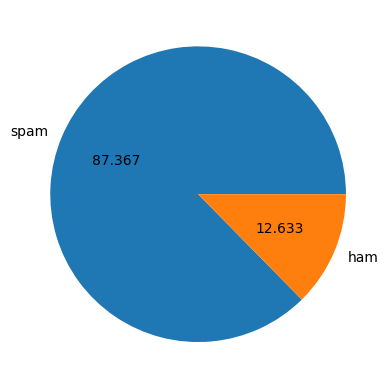

In [88]:
import matplotlib.pyplot as plt
plt.pie(data['result'].value_counts() , labels = ['spam' , 'ham'] , autopct='%0.3f')
plt.show()

In [89]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
data['num_characters'] = data['sms'].apply(len)

In [91]:
data.head()

,result,sms,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [92]:
# Tokenization
data['sms'].apply(lambda  x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: sms, Length: 5169, dtype: object

In [93]:
data['sms'].apply(lambda  x:len( nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: sms, Length: 5169, dtype: int64

In [94]:
data['num_words'] = data['sms'].apply(lambda  x:len( nltk.word_tokenize(x)))
data.head()

,result,sms,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [95]:
data['num_sentences'] = data['sms'].apply(lambda x: nltk.sent_tokenize(x))

In [96]:
data['num_sentences'] = data['sms'].apply(lambda x:len( nltk.sent_tokenize(x)))

In [97]:
data.head()

,result,sms,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='num_characters', ylabel='Count'>

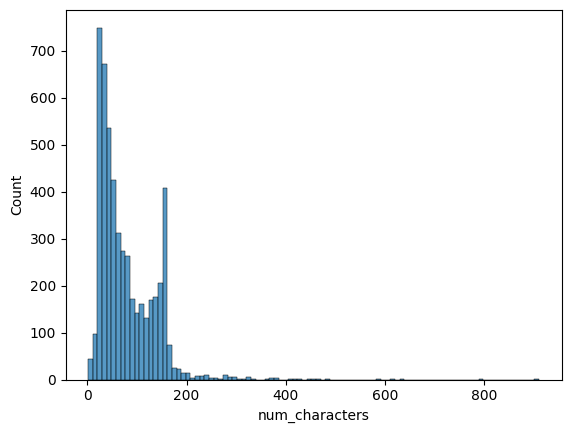

In [98]:
import seaborn as sns
sns.histplot(data['num_characters'])

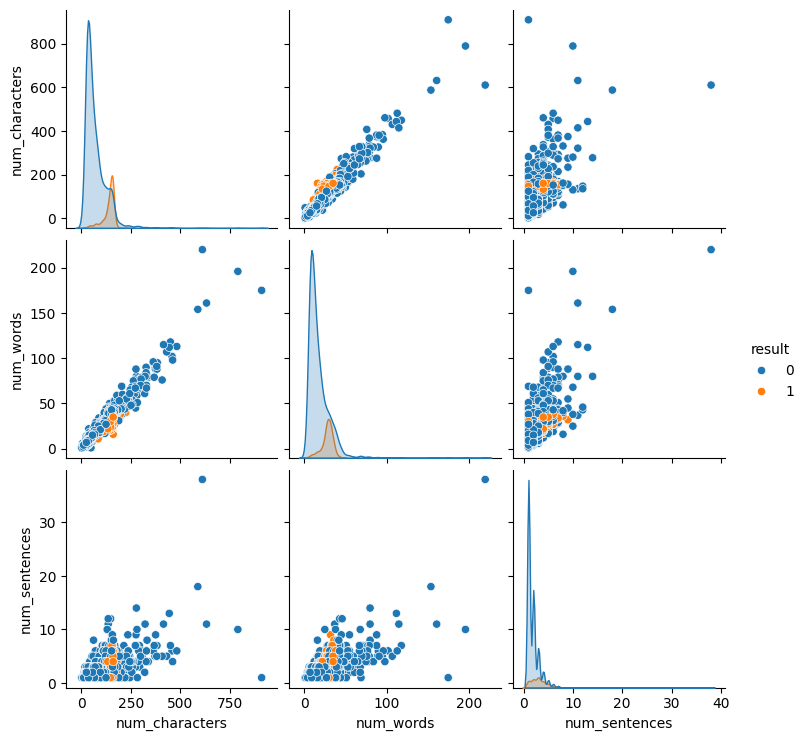

In [99]:
sns.pairplot(data , hue = 'result')

In [100]:
# ham analysis
data[data['result'] == 0][['num_characters' , 'num_words' , 'num_sentences' ]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
# spam analysis
data[data['result'] == 1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [102]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
# PRE-PROCESSING [Tokeniztion , Lower case , Stemming , SPECIAL_CHARACS/Punct/stopwords]

from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


def data_processed(sm):
  sm = sm.lower()
  sm = nltk.word_tokenize(sm)

  y = []
  for i in sm:
    if i.isalnum():
            y.append(i)


  sm = y[:]
  y.clear()


  for i in sm:
   if i not in stopwords.words('english') and i not in string.punctuation:
         y.append(i)

   sm = y[:]
   y.clear()
   for i in sm:
          y.append(ps.stem(i))

  return " ".join(y)


In [104]:
data_processed('i will be dancing so HARD panchod')


'danc hard panchod'

In [105]:
data['sms'].apply(data_processed)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: sms, Length: 5169, dtype: object

In [106]:
data['transformed_sms'] = data['sms'].apply(data_processed)

In [107]:
!pip install matplotlib
!pip install pandas
!pip install wordcloud

In [108]:
# Most significant words vs less impt Words Display
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size =10 , background_color ='black' )

In [109]:
wc.generate(data[data['result'] == 1]['transformed_sms'].str.cat(sep = " "))

In [110]:
spam_wc = wc.generate(data[data['result'] == 1]['transformed_sms'].str.cat(sep = " "))

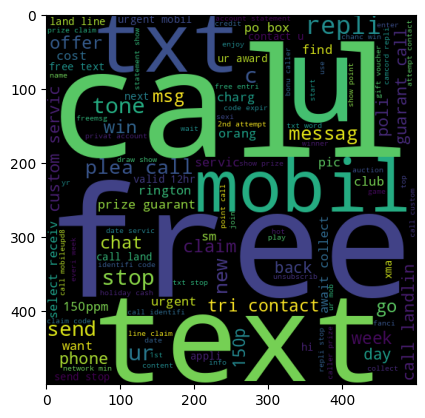

In [111]:
plt.imshow(spam_wc)

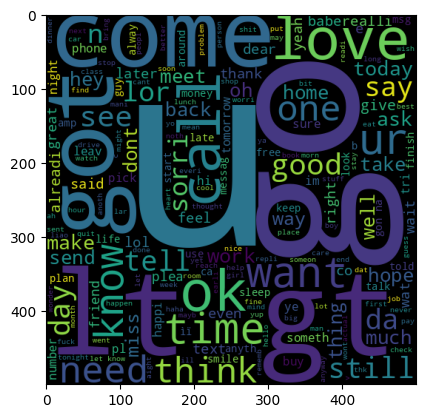

In [112]:
ham_wc = wc.generate(data[data['result'] == 0]['transformed_sms'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [113]:
# top occuring words in each class
# FOR SPAM

data[data['result'] == 1 ]['transformed_sms'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg plea confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord plea call 08000930705 deliveri tomorrow',
 'sm

In [114]:
for msg in data[data['result'] == 1 ]['transformed_sms'].tolist():
  print(msg)


free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg plea confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord plea call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wing

In [115]:
 spam_corpus = [ ]

for msg in data[data['result'] == 1 ]['transformed_sms'].tolist():
   for word in msg.split():
     spam_corpus.append(word)


In [116]:
len(spam_corpus)

9939

In [140]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30)) [0] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

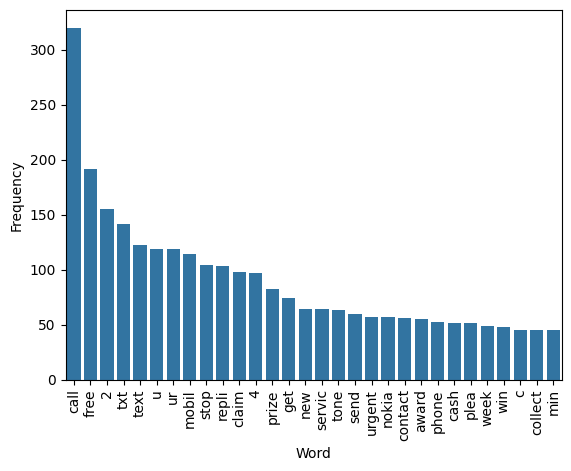

In [145]:
df_spam_corpus = pd.DataFrame(Counter(spam_corpus).most_common(30) , columns = ('Word' , 'Frequency'))

# Use the 'x' and 'y' parameters to specify the columns for plotting
sns.barplot(x='Word', y='Frequency', data=df_spam_corpus)
plt.xticks(rotation='vertical')
plt.show()



MODEL BUILDING ( BoW / TF-IDF Vectorizer )




In [153]:
!pip install scikit-learn

In [162]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(data['transformed_sms']).toarray()

In [201]:
x.shape

(5169, 6708)

In [164]:
y = data['result']

In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x ,y , test_size= 0.2 , random_state = 2)

In [ ]:
# CountVectorizer Method

In [172]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [179]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_pred1 , y_test))
print(confusion_matrix(y_test ,y_pred1))
print(precision_score(y_test , y_pred1))

0.8820116054158608
[[794 102]
 [ 20 118]]
0.5363636363636364


In [184]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [186]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# BY USING TF-IDF Vectorizer

In [211]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 2800) # Performance Improvement ( we did trying reducing
x = tfidf.fit_transform(data['transformed_sms']).toarray()

In [212]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x ,y , test_size= 0.2 , random_state = 2)

In [213]:
gnb.fit(x_train,y_train)
y_pred4 = gnb.predict(x_test)
print(accuracy_score(y_pred4 , y_test))
print(confusion_matrix(y_test ,y_pred4))
print(precision_score(y_test , y_pred4))

0.8684719535783365
[[787 109]
 [ 27 111]]
0.5045454545454545


In [214]:
mnb.fit(x_train,y_train)
y_pred5 = mnb.predict(x_test)
print(accuracy_score(y_test , y_pred5))
print(confusion_matrix(y_test , y_pred5))
print(precision_score(y_test , y_pred5))

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [199]:
bnb.fit(x_train,y_train)
y_pred6 = bnb.predict(x_test)
print(accuracy_score(y_test , y_pred6))
print(confusion_matrix(y_test , y_pred6))
print(precision_score(y_test , y_pred6))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [219]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))